In [2]:
import duckdb
import matplotlib.pyplot as plt

In [3]:
monday = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        AVG(base_passenger_fare / trip_miles) AS avg_fare
    FROM "nyc_data.parquet"
    WHERE strftime(pickup_datetime, '%A') = 'Monday' AND trip_miles > 0
    GROUP BY hour
    ORDER BY hour
""")

In [4]:
tuesday = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        AVG(base_passenger_fare / trip_miles) AS avg_fare
    FROM "nyc_data.parquet"
    WHERE strftime(pickup_datetime, '%A') = 'Tuesday' AND trip_miles > 0
    GROUP BY hour
    ORDER BY hour
""")

In [5]:
wednesday = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        AVG(base_passenger_fare / trip_miles) AS avg_fare
    FROM "nyc_data.parquet"
    WHERE strftime(pickup_datetime, '%A') = 'Wednesday' AND trip_miles > 0
    GROUP BY hour
    ORDER BY hour
""")

In [6]:
thursday = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        AVG(base_passenger_fare / trip_miles) AS avg_fare
    FROM "nyc_data.parquet"
    WHERE strftime(pickup_datetime, '%A') = 'Thursday' AND trip_miles > 0
    GROUP BY hour
    ORDER BY hour
""")

In [7]:
friday = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        AVG(base_passenger_fare / trip_miles) AS avg_fare
    FROM "nyc_data.parquet"
    WHERE strftime(pickup_datetime, '%A') = 'Friday' AND trip_miles > 0
    GROUP BY hour
    ORDER BY hour
""")

In [8]:
saturday = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        AVG(base_passenger_fare / trip_miles) AS avg_fare
    FROM "nyc_data.parquet"
    WHERE strftime(pickup_datetime, '%A') = 'Saturday' AND trip_miles > 0
    GROUP BY hour
    ORDER BY hour
""")

In [9]:
sunday = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        AVG(base_passenger_fare / trip_miles) AS avg_fare
    FROM "nyc_data.parquet"
    WHERE strftime(pickup_datetime, '%A') = 'Sunday' AND trip_miles > 0
    GROUP BY hour
    ORDER BY hour
""")

In [12]:
# avg_df = average.df()
# percentiles_50_df = percentiles_50.df()
# percentiles_25_df = percentiles_25.df()
# percentiles_75_df = percentiles_75.df()
# percentiles_90_df = percentiles_90.df()

# # Convert 'hour' to numeric for proper sorting
# avg_df["hour"] = avg_df["hour"].astype(int)
# percentiles_50_df["hour"] = percentiles_50_df["hour"].astype(int)
# percentiles_25_df["hour"] = percentiles_25_df["hour"].astype(int)
# percentiles_75_df["hour"] = percentiles_75_df["hour"].astype(int)
# percentiles_90_df["hour"] = percentiles_90_df["hour"].astype(int)

mo_df = monday.df()
tu_df = tuesday.df()
we_df = wednesday.df()
th_df = thursday.df()
fr_df = friday.df()
sa_df = saturday.df()
su_df = sunday.df()

# plt.plot(mo_df["hour"], mo_df["avg_fare"], label="Monday")
# plt.plot(tu_df["hour"], tu_df["avg_fare"], label="Tuesday")
# plt.plot(we_df["hour"], we_df["avg_fare"], label="Wednesday")
# plt.plot(th_df["hour"], th_df["avg_fare"], label="Thursday")
# plt.plot(fr_df["hour"], fr_df["avg_fare"], label="Friday")
# plt.plot(sa_df["hour"], sa_df["avg_fare"], label="Saturday")
# plt.plot(su_df["hour"], su_df["avg_fare"], label="Sunday")

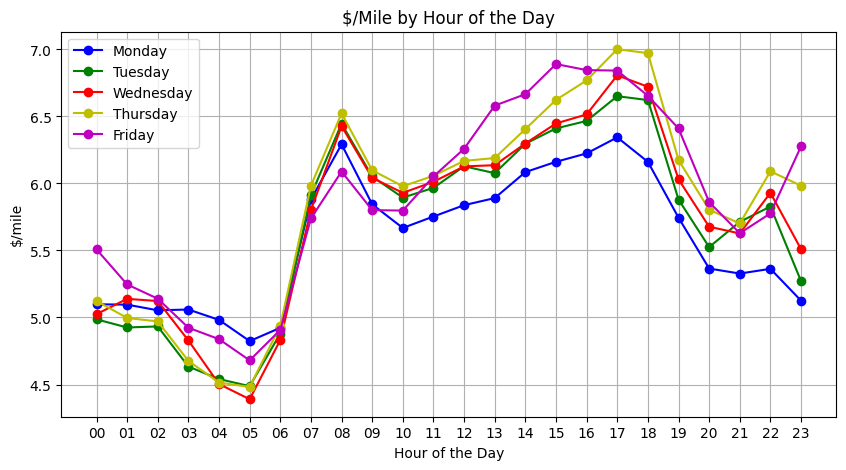

In [23]:
# Plot data
plt.figure(figsize=(10, 5))
plt.plot(mo_df["hour"], mo_df["avg_fare"], marker="o", linestyle="-", color="b", label="Monday")
plt.plot(tu_df["hour"], tu_df["avg_fare"], marker="o", linestyle="-", color="g", label="Tuesday")
plt.plot(we_df["hour"], we_df["avg_fare"], marker="o", linestyle="-", color="r", label="Wednesday")
plt.plot(th_df["hour"], th_df["avg_fare"], marker="o", linestyle="-", color="y", label="Thursday")
plt.plot(fr_df["hour"], fr_df["avg_fare"], marker="o", linestyle="-", color="m", label="Friday")

# Customize plot
plt.xlabel("Hour of the Day")
plt.ylabel("$/mile")
plt.title("$/Mile by Hour of the Day")
plt.xticks(range(0, 24))  # Show all hours from 0 to 23
plt.grid(True)
plt.legend()

# Show plot
plt.show()

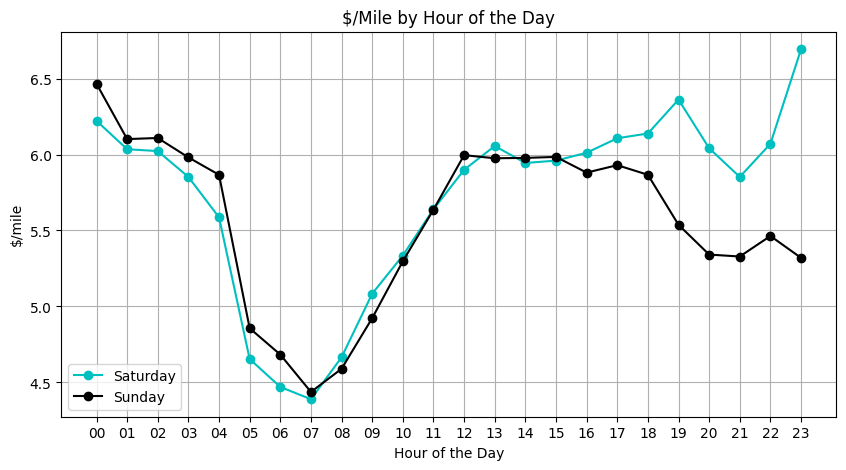

In [22]:
# Plot data
plt.figure(figsize=(10, 5))
plt.plot(sa_df["hour"], sa_df["avg_fare"], marker="o", linestyle="-", color="c", label="Saturday")
plt.plot(su_df["hour"], su_df["avg_fare"], marker="o", linestyle="-", color="k", label="Sunday")

# Customize plot
plt.xlabel("Hour of the Day")
plt.ylabel("$/mile")
plt.title("$/Mile by Hour of the Day")
plt.xticks(range(0, 24))  # Show all hours from 0 to 23
plt.grid(True)
plt.legend()

# Show plot
plt.show()

In [17]:
weekday = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        AVG(base_passenger_fare / trip_miles) AS avg_fare
    FROM "nyc_data.parquet"
    WHERE strftime(pickup_datetime, '%A') IN ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday') AND trip_miles > 0
    GROUP BY hour
    ORDER BY hour
""")

In [18]:
weekend = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        AVG(base_passenger_fare / trip_miles) AS avg_fare
    FROM "nyc_data.parquet"
    WHERE strftime(pickup_datetime, '%A') IN ('Saturday', 'Sunday') AND trip_miles > 0
    GROUP BY hour
    ORDER BY hour
""")

In [19]:
weekday_df = weekday.df()
weekend_df = weekend.df()

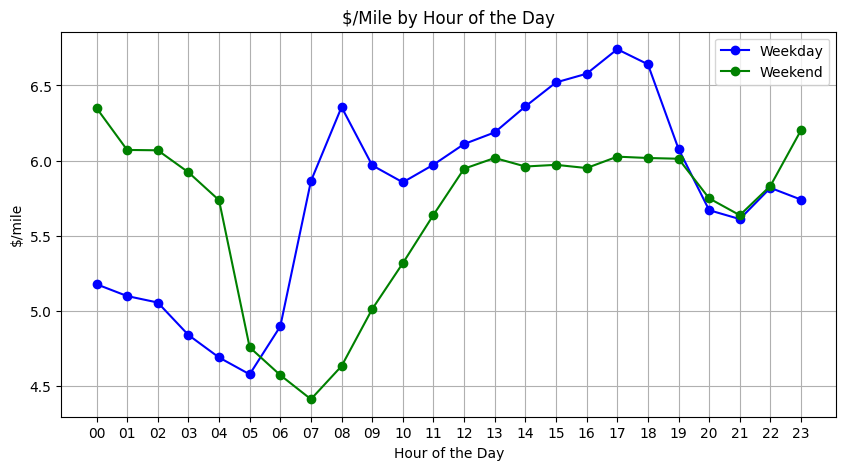

In [21]:
# Plot data
plt.figure(figsize=(10, 5))
plt.plot(weekday_df["hour"], weekday_df["avg_fare"], marker="o", linestyle="-", color="b", label="Weekday")
plt.plot(weekend_df["hour"], weekend_df["avg_fare"], marker="o", linestyle="-", color="g", label="Weekend")

# Customize plot
plt.xlabel("Hour of the Day")
plt.ylabel("$/mile")
plt.title("$/Mile by Hour of the Day")
plt.xticks(range(0, 24))  # Show all hours from 0 to 23
plt.grid(True)
plt.legend()

# Show plot
plt.show()